# Dog Breed Classification

In [72]:
# Finding the average height and width for all images so we can decide what image size to use to train the model.

from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

DIR = './data'
heights = []
widths = []
img_count = 0
for img in os.listdir(DIR):
    path = os.path.join(DIR, img)
    if "DS_Store" not in path:
        data = np.array(Image.open(path))
        heights.append(data.shape[0])
        widths.append(data.shape[1])
        img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
print("Average Height: " + str(avg_height))
print('\n')
print("Average Width: " + str(avg_width))
    

   

Average Height: 312.57943925233644


Average Width: 338.79906542056074


In [7]:
# Defining Model and its layers 

from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten,Dropout
import numpy as np
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(300,300,3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))
classifier.add(Conv2D(32,(3,3))) 
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))
classifier.add(Conv2D(32,(3,3))) 
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))
classifier.add(Flatten())
classifier.add(Dense(64))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))
classifier.compile(optimizer ='rmsprop',
                   loss ='binary_crossentropy',
                   metrics =['accuracy'])

In [73]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
activation_6 (Activation)    (None, 147, 147, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 32)       

In [8]:
#Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale =1./255,
                                   shear_range =0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip =True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
# Setting training and testing data directories
training_set = train_datagen.flow_from_directory('./Train',
                                                target_size=(300,300), #300,300 from above calculated average
                                                batch_size= 32,
                                                class_mode='binary')

test_set = test_datagen.flow_from_directory('./Test',
                                           target_size = (300,300),
                                           batch_size = 32,
                                           class_mode ='binary')

Found 492 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [48]:
# Training the model
from IPython.display import display
from PIL import Image
classifier.fit(training_set,steps_per_epoch =len(training_set),
                        epochs = 10,
                        validation_data =test_set,
                        validation_steps = len(test_set),verbose = 1)

Epoch 1/10
16/16 [==============================] - 35s 2s/step - loss: 0.0109 - accuracy: 0.9980 - val_loss: 1.7677 - val_accuracy: 0.8533
Epoch 2/10
16/16 [==============================] - 34s 2s/step - loss: 0.1465 - accuracy: 0.9817 - val_loss: 1.8078 - val_accuracy: 0.8400
Epoch 3/10
16/16 [==============================] - 34s 2s/step - loss: 0.0571 - accuracy: 0.9797 - val_loss: 1.8998 - val_accuracy: 0.8133
Epoch 4/10
16/16 [==============================] - 34s 2s/step - loss: 0.0791 - accuracy: 0.9837 - val_loss: 1.7910 - val_accuracy: 0.8133
Epoch 5/10
16/16 [==============================] - 34s 2s/step - loss: 0.0150 - accuracy: 0.9919 - val_loss: 1.6003 - val_accuracy: 0.8200
Epoch 6/10
16/16 [==============================] - 34s 2s/step - loss: 0.0405 - accuracy: 0.9837 - val_loss: 1.1182 - val_accuracy: 0.8333
Epoch 7/10
16/16 [==============================] - 34s 2s/step - loss: 0.0315 - accuracy: 0.9878 - val_loss: 1.8074 - val_accuracy: 0.8267
Epoch 8/10
16/16 [==

In [49]:
# Saving the model
classifier.save('dogbreed_cnn_model1.h5')

In [50]:
#Loading the model
from keras.models import load_model 
classifier = load_model('dogbreed_cnn_model1.h5')

dog breed 2


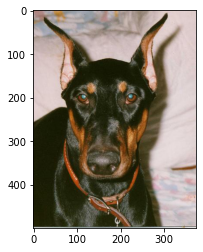

In [83]:
# Testing the model
import numpy as np
from matplotlib import pyplot
from matplotlib.image import imread
from IPython.display import Image
from keras.preprocessing import image
test_image =image.load_img('./Test/2/n02107142_15003.jpg',target_size =(300,300))
test_image =image.img_to_array(test_image)
test_image =np.expand_dims(test_image, axis =0)
result = classifier.predict(test_image)
image = imread('./Test/2/n02107142_15003.jpg') #display image
pyplot.imshow(image)
if result[0][0] >= 0.5:
    prediction = 'dog breed 2'
else:
    prediction = 'dog breed 1'
print(prediction)



In [70]:
# Evaluating the model on testing data
_, acc = classifier.evaluate_generator(test_set, steps=len(test_set), verbose=1)
print('> %.3f' % (acc * 100.0))

5/5 [==============================] - 2s 360ms/step - loss: 1.6093 - accuracy: 0.8467
> 84.667
